# MIS 583 Assignment #7 Text Sentiment Classification

## Overview

**Sentiment Classification** is an automated process of identifying opinions in text and labeling them as positive, negative, or neutral, based on the emotions customers express within them.

In this assignment, you need to train a recurrent neural network (RNN)or fine-tune a pre-trained language model (e.g., BERT) to predict thesentiment of given tweet.

##  Versions of used packages

We will check PyTorch version to make sure everything work properly.

I use `python 3.8.11`, `torch==1.8.2` and `torchvision==0.9.2`.  
I use `transformers==4.8.2`.

In [ ]:
# installing or importing SentencePiece before transformers works.
!pip install sentencepiece  

     |████████████████████████████████| 1.2 MB 13.6 MB/s 


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 14.1 MB/s 
     |████████████████████████████████| 596 kB 72.7 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 3.3 MB 60.4 MB/s 
     |████████████████████████████████| 895 kB 62.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import sys
import torch
import torchvision
import transformers
print('python', sys.version.split('\n')[0])
print('torch', torch.__version__)
print('torchvision', torchvision.__version__)
print('transformers', transformers.__version__)

python 3.7.12 (default, Sep 10 2021, 00:21:48) 
torch 1.10.0+cu111
torchvision 0.11.1+cu111
transformers 4.15.0


## Loading Model and Data

First, we are going to talk about the model.  
HuggingFace team have created an amazing framework called "transformers" for NLP tasks.  
It havs many State-of-the-art Machine Learning for Pytorch, TensorFlow, and JAX.  

To start with this package, follow [this link to installation and basic tutorial](https://pytorch.org/hub/huggingface_pytorch-transformers/).

In [ ]:
# from torch import nn
# from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
# #bert_type = 'microsoft/deberta-base'
# bert_type = 'microsoft/deberta-v3-large'
# #bert_type = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
# tokenizer = AutoTokenizer.from_pretrained(bert_type)
# model = AutoModelForSequenceClassification.from_pretrained(bert_type)

# model.classifier = nn.Linear(in_features=1024, out_features=3, bias=False)

In [ ]:
# from torch import nn
# from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
# #bert_type = 'microsoft/deberta-base'
# bert_type = 'microsoft/deberta-v3-large'
# #bert_type = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
# tokenizer = AutoTokenizer.from_pretrained(bert_type)
# model = AutoModelForSequenceClassification.from_pretrained(bert_type)

# model.classifier = nn.Linear(in_features=1024, out_features=3, bias=False)

In [ ]:
# from torch import nn

# from transformers import XLNetTokenizer, XLNetForSequenceClassification

# #xlnet_type = 'xlnet-base-cased'
# #xlnet_type = 'xlnet-large-cased'

# tokenizer = XLNetTokenizer.from_pretrained(xlnet_type)
# model = XLNetForSequenceClassification.from_pretrained(xlnet_type)
# model.logits_proj = nn.Linear(in_features=1024, out_features=3, bias=False)

In [ ]:
from torch import nn

#########################################################################
#            Loading tokenizer and model from transformer               #
#########################################################################
from transformers import RobertaTokenizer, RobertaForSequenceClassification

#bert_type = 'roberta-base'
bert_type = 'cardiffnlp/twitter-roberta-base-sentiment'
#bert_type = 'cardiffnlp/twitter-xlm-roberta-base'
#bert_type = 'roberta-large'

tokenizer = RobertaTokenizer.from_pretrained(bert_type)

# create a Bert-extended task (classification)
model =  RobertaForSequenceClassification.from_pretrained(bert_type)

# for param in model.roberta.encoder.layer[:-1].parameters():
#     param.requires_grad = False

# finetune from the output from bert to your task
model.classifier.dense = nn.Linear(in_features=768, out_features=768, bias=False)
model.classifier.dropout = nn.Dropout(0.3)
model.classifier.out_proj = nn.Linear(768, 3, bias=False)
#########################################################################
#                          End of your code                             #
#########################################################################

In [ ]:
# from torch import nn

#########################################################################
#            Loading tokenizer and model from transformer               #
#########################################################################
#from transformers import BertTokenizer, BertForSequenceClassification

#bert_type = 'bert-base-cased'
#bert_type = 'bert-large-cased'
#tokenizer = BertTokenizer.from_pretrained(bert_type)

# create a Bert-extended task (classification)
#model =  BertForSequenceClassification.from_pretrained(bert_type)

# finetune from the output from bert to your task
#model.classifier = nn.Linear(1024, 3, bias=False)
#########################################################################
#                          End of your code                             #
#########################################################################

In [ ]:
model

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La





## How to Get Data

Please open the file `twitter_sentiment.zip`, creat shortcut to your Google Drive.

1. open [LINK of Google Drive](https://drive.google.com/file/d/14SdYQ6FSowQnWVCd4dP12jQMjX9-YJIh/view?usp=sharing)
2. Click "Add shortcut to Drive" in the top-right corner.
3. Select the location where you want to place the shortcut.
4. Click Add shortcut.

After above procedures, we have a shortcut of zip file of dataset.  
We can access this in colab after granting the permission of Google Drive.

---

請先到共用雲端硬碟將檔案 `twitter_sentiment.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/14SdYQ6FSowQnWVCd4dP12jQMjX9-YJIh/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

1. Executing the below code which will provide you with an authentication link
2. Open the link
3. Choose the Google account whose Drive you want to mount
4. Allow Google Drive Stream access to your Google Account
5. Copy the code displayed, paste it in the text box as shown below, and press Enter
![](https://i1.wp.com/neptune.ai/wp-content/uploads/colab-code-copy.png?resize=512%2C102&ssl=1)

Finish!

---

執行此段後點選出現的連結，允許授權後，複製授權碼，貼在空格中後按下ENTER，即完成與雲端硬碟連結。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip Data

Unzip `twitter_sentiment.zip`, there are 3 csv files.

- `train.csv`, `test.csv` and `val.csv`

There are **10248** datas in training set.  
There are **1461** datas in validation set.  
There are **2928** datas in testing set.  

---

解壓縮 `twitter_sentiment.zip` 後可以發現裡面有兩個資料夾和三個csv檔。

- `train.csv`, `test.csv` and `val.csv`

Training set 有 **10248** 筆資料.  
Validation set 有 **1461** 筆資料.  
Testing set 有 **2928** 筆資料.  

注意: 若有另外設定存放在雲端硬碟中的路徑，請記得本處路徑也須做更動。

In [ ]:
!unzip -qq ./drive/MyDrive/Colab\ Notebooks/NSYSU\ IM/深度學習/Assignment7/twitter_sentiment.zip

In [ ]:
# Utility function to extract text and label from csv file
def get_texts(f_name='./twitter_sentiment', mode='train'):
    text_list = []
    label_list = []
    
    f_path = os.path.join(f_name, '{}.csv'.format(mode))
    with open(f_path) as f:
        reader = csv.DictReader(f)
        for line in reader:
            text_list.append(line['text'])
            if mode != 'test':
                label_list.append(int(line['sentiment_label']))

    return text_list, label_list

In [ ]:
import os
import csv
import torch
from torch.utils.data import Dataset, DataLoader
class TwitterDataset(Dataset):
    def __init__(self, f_name='./twitter_sentiment', mode='train'):
        self.mode = mode
        
        text_list, label_list = get_texts(f_name, mode)
        print('mode', mode, 'has', len(text_list), 'datas')
        text_list = tokenizer(text_list,
                             truncation=True, padding=True,
                             return_tensors='pt')

        self.text_list = text_list['input_ids']
        self.mask_list = text_list['attention_mask']

        self.label_list = label_list
    
    def __getitem__(self, idx):
        text = self.text_list[idx]
        mask = self.mask_list[idx]
        if self.mode == 'test':
            return text, mask
        label = torch.tensor(self.label_list[idx])
        return text, mask, label

    def __len__(self):
        return len(self.text_list)

In [ ]:
dataset_train = TwitterDataset(mode='train')
dataset_val = TwitterDataset(mode='val')
dataset_test = TwitterDataset(mode='test')

batch_size = 100
train_data = DataLoader(dataset_train, batch_size=batch_size,
                       shuffle=True)
val_data = DataLoader(dataset_val, batch_size=batch_size // 2,
                       shuffle=False)
test_data = DataLoader(dataset_test, batch_size=batch_size // 2,
                       shuffle=False)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


mode train has 10248 datas
mode val has 1464 datas
mode test has 2928 datas


In [ ]:
t = tokenizer.convert_ids_to_tokens(dataset_train[0][0])
print('token', t)
print('token to s', tokenizer.convert_tokens_to_string(t))

token ['<s>', '▁@', 'uni', 'ted', '▁sat', '▁at', '▁airport', '▁for', '▁5', '▁hr', 's', '▁still', '▁sitting', '▁at', '▁gate', '.', '.', '▁S', 'igh', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
token to s <s> @united sat at airport for 5 hrs still sitting at gate.. Sigh</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


In [ ]:
device = torch.device('cuda')

from torch import nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

## Utility Function

In [ ]:
def accuracy(raw_preds, y):
    preds = raw_preds.argmax(dim=1)
    acc = (preds == y).sum()
    return acc

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_loss_list = []
val_loss_list = []

def train(model, data, optimizer, criterion):
    model.train()
    
    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)
        
        #########################################################################
        #                          Testing process                              #
        #########################################################################
        # 1. clean the gradients of optimizer
        # 2. put correct variables into model
        # 3. get prediction
        # 4. Evalutate by criterion and accuracy
        optimizer.zero_grad()
        outputs = model(input_ids=text, 
                        attention_mask=mask,
                        )
        preds = outputs[0]
        #print(preds.shape)
        loss = criterion(preds, label)
        acc = accuracy(outputs[0], label)
        
        #########################################################################
        #                          End of your code                             #
        #########################################################################
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        train_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

def test(model, data, criterion, log_loss=False):
    model.eval()
    
    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Training process                             #
        #########################################################################
        # 1. put correct variables into model
        # 2. get prediction
        # 3. Evalutate by criterion and accuracy
        outputs = model(input_ids=text, 
                        attention_mask=mask)
        preds = outputs[0]
        loss = criterion(preds, label)
        acc = accuracy(outputs[0], label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################
        
        epoch_loss += loss.item()
        if log_loss:
            val_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

# class for monitoring train and test acc/loss
class Meter:
    def __init__(self):
        self.train_loss_list = []
        self.train_acc_list = []
        self.val_loss_list = []
        self.val_acc_list = []
    
    def update(self, train_loss, train_acc, val_loss, val_acc):
        self.train_loss_list.append(train_loss)
        self.train_acc_list.append(train_acc)
        self.val_loss_list.append(val_loss)
        self.val_acc_list.append(val_acc)
    
    def plot(self):
        x = range(len(self.train_loss_list))
        plt.plot(x, self.train_loss_list)
        plt.plot(x, self.val_loss_list, color='r')
        plt.legend(['train_loss', 'val_loss'])
        plt.show()
        plt.plot(x, self.train_acc_list)
        plt.plot(x, self.val_acc_list, color='r')
        plt.legend(['train_acc', 'val_acc'])
        plt.show()

## Start Training

In [ ]:
import os

#os.makedirs('./drive/MyDrive/Colab Notebooks/NSYSU IM/深度學習/Final Project/assign7_ckpts', exist_ok=True)
os.makedirs('./ckpts', exist_ok=True)

In [ ]:
#########################################################################
#                          Hyper-parameters                             #
#########################################################################
max_epoch = 5
log_interval = 1
best_acc = 0
#########################################################################
#                          End of your code                             #
#########################################################################

m = Meter()

for epoch in range(1, max_epoch + 1):
    train_loss, train_acc = train(model, train_data, optimizer, criterion)
    val_loss, val_acc = test(model, val_data, criterion, log_loss=True)
    
    if epoch % log_interval == 0:
        print('Epoch {} train_loss: {} train_acc: {}'.format(
            epoch, train_loss, train_acc
        ))
        print('Epoch {} val_loss:  {} val_acc : {}'.format(
            epoch, val_loss, val_acc
        ))
    
    m.update(train_loss, train_acc, val_loss, val_acc)
    
    # model checkpoint
    torch.save(model.state_dict(), 'ckpts/e{}.pt'.format(epoch))
    if val_acc > best_acc:
        best_model = model
        best_acc = val_acc
        print('-'*10, 'e', epoch, 'save best model', '-'*10)

100%|██████████| 30/30 [00:02<00:00, 10.34it/s]


Epoch 1 train_loss: 0.006196067426397315 train_acc: 0.7347775175644028
Epoch 1 val_loss:  0.0078151196221022 val_acc : 0.8510928961748634
---------- e 1 save best model ----------


100%|██████████| 30/30 [00:02<00:00, 10.36it/s]


Epoch 2 train_loss: 0.0035168968423165722 train_acc: 0.870023419203747
Epoch 2 val_loss:  0.007533229663560951 val_acc : 0.8599726775956285
---------- e 2 save best model ----------


100%|██████████| 30/30 [00:02<00:00, 10.34it/s]


Epoch 3 train_loss: 0.00273100253860528 train_acc: 0.9053473848555815
Epoch 3 val_loss:  0.007942893669579199 val_acc : 0.8613387978142076
---------- e 3 save best model ----------


100%|██████████| 30/30 [00:02<00:00, 10.36it/s]


Epoch 4 train_loss: 0.0019528642871143016 train_acc: 0.9355971896955504
Epoch 4 val_loss:  0.009250454686052812 val_acc : 0.8640710382513661
---------- e 4 save best model ----------


100%|██████████| 30/30 [00:02<00:00, 10.33it/s]


Epoch 5 train_loss: 0.0014322747899529107 train_acc: 0.9569672131147541
Epoch 5 val_loss:  0.010638950616528428 val_acc : 0.8510928961748634


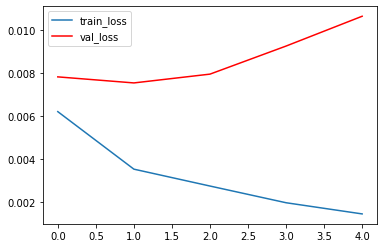

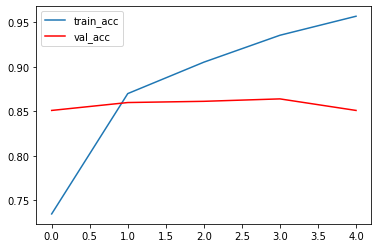

In [ ]:
# plot them out
m.plot()

## Prediction

In [ ]:
best_model.eval()

total_out = []
for text, mask in tqdm(test_data, total=len(test_data)):
    text = text.to(device)
    mask = mask.to(device)

    output = best_model(text, mask)
    pred = output.logits
    pred = torch.argmax(pred, dim=1)
    total_out.append(pred)

total_out = torch.cat(total_out).cpu().numpy().tolist()

with open('pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(total_out):
        f.write('{},{}\n'.format(i, pred))

100%|██████████| 59/59 [00:06<00:00,  9.54it/s]
